## 2CS501: MACHINE LEARNING
<b>Name: Anushree Deota <br>
R. No.: 19BCE046</b>

### PRACTICAL 3 : 
## Simple and Multiple Linear Regression using Gradient Descent & Normal Equation Method (without using sklearn or equivalent library for both)

### LINEAR REGRESSION IN SINGLE VARIABLES: 
### (i) GRADIENT DESCENT

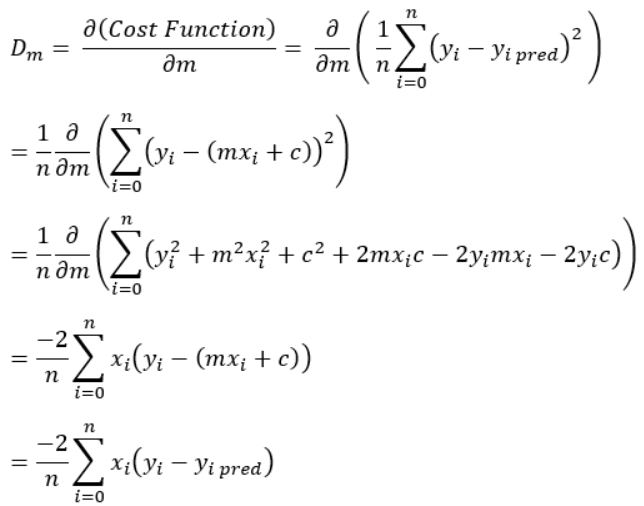

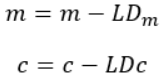

In [56]:
import matplotlib.pyplot as plt
import seaborn
import pandas as pd
import numpy as np

# Reading from CSV file
data = pd.read_csv("Train.csv")
test=pd.read_csv("Test.csv")


x_all=data['x']
y_all=data['y']
B = np.zeros((2,1))  # theta
m=len(data['x'])
print('m',m)
x=np.ones((2,m),dtype=float)
x[1,:]=x_all[0:m]
y=y_all[0:m]
y=np.array(y,dtype=float)
iterations=100
alpha=0.0001
cost_store=np.zeros((iterations,1))
theta_store=np.zeros((2,iterations))
print('x shape:',x.shape,'\ny shape',y.shape)
print('Iter:',-1,'Theta',B)

for i in range(iterations):
    update=np.zeros((x.shape[0],1))
    pred=np.dot(B.T,x)
    error=pred-y
    for j in range(x.shape[0]):
        update[j]=np.sum(np.dot(x[j,:],error.T))
    B=B-(1/x.shape[1])*alpha*update
    c=np.sum(np.dot(error,error.T))
    cost_store[i]=c
    theta_store[:,i]=B[:,0]
    print(B)

theta=B[:,0]

m 699
x shape: (2, 699) 
y shape (699,)
Iter: -1 Theta [[0.]
 [0.]]
[[0.00499399]
 [0.33354246]]
[[0.00831928]
 [0.55570352]]
[[0.01053313]
 [0.70367731]]
[[0.01200667]
 [0.80223752]]
[[0.01298712]
 [0.86788507]]
[[0.01363914]
 [0.91161064]]
[[0.01407241]
 [0.94073474]]
[[0.01435997]
 [0.9601333 ]]
[[0.01455048]
 [0.97305403]]
[[0.01467635]
 [0.98166009]]
[[0.01475916]
 [0.9873923 ]]
[[0.0148133 ]
 [0.99121035]]
[[0.01484833]
 [0.99375343]]
[[0.01487065]
 [0.99544731]]
[[0.01488449]
 [0.99657555]]
[[0.01489268]
 [0.99732705]]
[[0.01489712]
 [0.99782762]]
[[0.01489905]
 [0.99816104]]
[[0.01489931]
 [0.99838314]]
[[0.01489846]
 [0.99853108]]
[[0.01489688]
 [0.99862964]]
[[0.0148948]
 [0.9986953]]
[[0.01489239]
 [0.99873905]]
[[0.01488976]
 [0.99876821]]
[[0.01488699]
 [0.99878764]]
[[0.01488412]
 [0.9988006 ]]
[[0.01488119]
 [0.99880925]]
[[0.01487821]
 [0.99881502]]
[[0.01487521]
 [0.99881889]]
[[0.01487218]
 [0.99882147]]
[[0.01486915]
 [0.99882321]]
[[0.0148661 ]
 [0.99882439]]
[[0.01

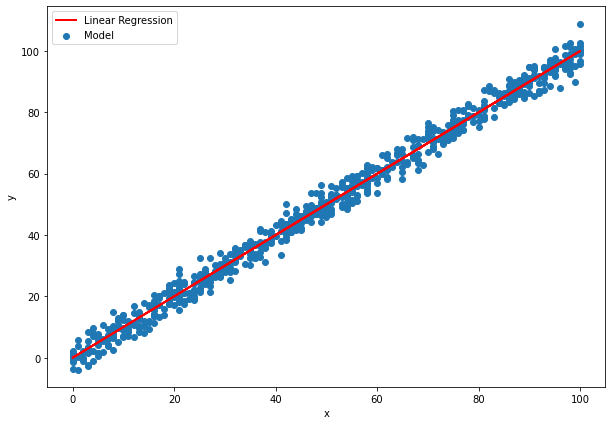

In [58]:
plt.figure(figsize=(10, 7))
ax = plt.axes()
model=ax.scatter(x_all[0:m],y,label='Model')
#predictions=ax.scatter(data['x'],pred_new,label='Predictions')
linear_regression=ax.plot(x[1,:],pred[0,:],color='red', label='Linear Regression',linewidth=2)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.legend()
plt.show()

Text(0, 0.5, 'Cost')

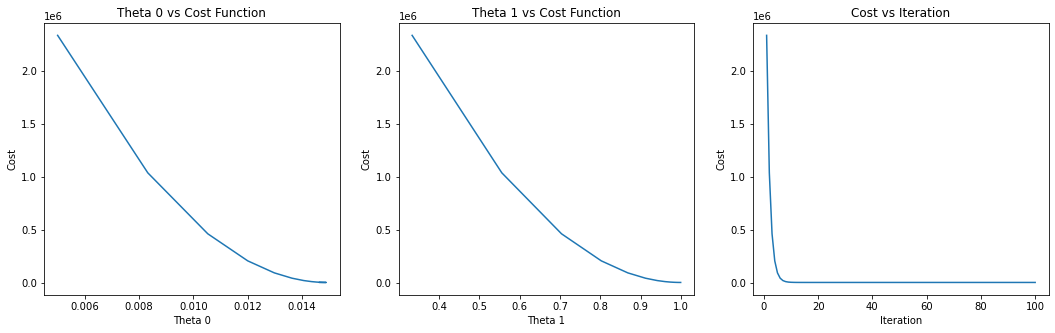

In [59]:
fig, (ax1, ax2,ax3) = plt.subplots(1,3)
#fig.suptitle('')
fig.set_size_inches(18, 5)

ax1.plot(theta_store[0,:],cost_store)
ax1.set_title('Theta 0 vs Cost Function')
ax1.set_xlabel('Theta 0')
ax1.set_ylabel('Cost')

ax2.plot(theta_store[1,:],cost_store)
ax2.set_title('Theta 1 vs Cost Function')
ax2.set_xlabel('Theta 1')
ax2.set_ylabel('Cost')

ax3.plot(np.arange(1,101,1),cost_store)
ax3.set_title('Cost vs Iteration')
ax3.set_xlabel('Iteration')
ax3.set_ylabel('Cost')


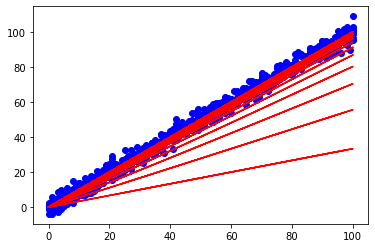

In [60]:
# VISUALISING CHANGE IN REGRESSION THROUGH EACH ITERATION

model=plt.scatter(x[1,:],y,label='Model',color="blue")
for t in range(theta_store.shape[1]):
    plt.plot(x[1,:],theta_store[0,t]+x[1,:]*theta_store[1,t],color="red")
plt.show()


In [61]:
pred_=pred[0,:]

In [62]:
from sklearn import  metrics
# MEAN SQUARED ERROR  &  MEAN ABSOLUTE ERROR
mse=(1/m)*(np.sum(np.square(pred_-y)))
mse_=metrics.mean_squared_error(pred_,y)
print('MSE:',mse,mse_)
mae=(1/m)*(np.sum(np.abs(pred_-y)))
mae_=metrics.mean_absolute_error(pred_,y)
print('MAE: ',mae,mae_)

MSE: 7.871480469994827 7.871480469994827
MAE:  2.228816398239096 2.228816398239096


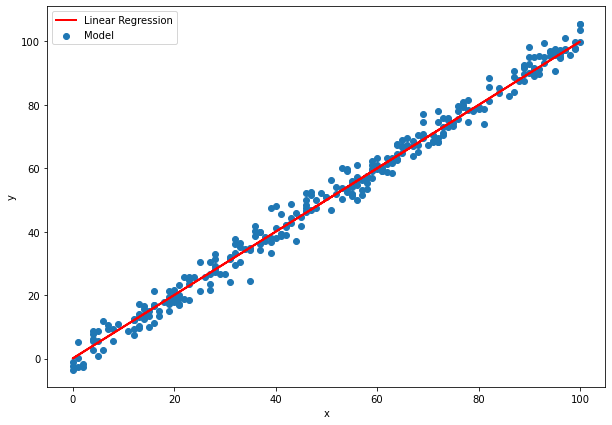

In [78]:
# TEST DATASET
test=pd.read_csv("Test.csv")

m=len(test['x'])
x=np.ones((2,m))
x[1,:]=test['x']
y=test['y']
pred_new=np.dot(B.T,x)#.reshape(x.shape[0])

plt.figure(figsize=(10, 7))
ax = plt.axes()
model=ax.scatter(x[1,:],y,label='Model')
linear_regression=ax.plot(x[1,:],pred_new[0,:],color='red', label='Linear Regression',linewidth=2)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.legend()
plt.show()

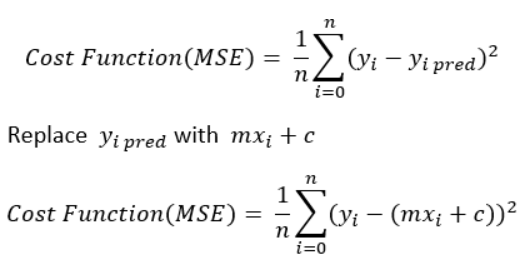

In [82]:
# MEAN SQUARED ERROR  &  MEAN ABSOLUTE ERROR FOR TEST DATASET
mse_=metrics.mean_squared_error(pred_new[0,:],y)
print('MSE: ',mse_)
mae_=metrics.mean_absolute_error(pred_new[0,:],y)
print('MAE: ',mae_)

MSE:  9.457158325272363
MAE:  2.4185302698969284


### (ii) NORMAL EQUATION METHOD
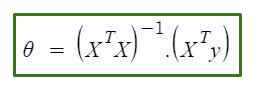

In [85]:
# NORMAL EQUATION METHOD
theta=[0,0]
data = pd.read_csv("Train.csv")
#data={'x':[630,370,616,700,430,568,1200,2976],'y':[15.5,7.5,13.9,18.7,8.2,13.2,23,87.3]}
l=len(data['x'])
x=np.ones((l,2))
x[:,1]=data['x']
y=data['y']
theta=np.dot(np.linalg.inv(np.dot(x.T,x)),np.dot(x.T,y))
print('Theta: ',theta)
pred_new=np.dot(x,theta)
print('Prediction: ',pred_new)

Theta:  [-0.10726546  1.00065638]
Prediction:  [23.9084877  49.92555363 14.90258026 37.91767705 86.94983976 35.91636428
 11.90061112 80.94590147 24.90914408  4.89601644 15.90323665 15.90323665
 23.9084877  38.91833343 53.92817916 59.93211745 25.90980046 72.94065041
 28.91176961 30.91308237 67.9373685  86.94983976 57.93080468 53.92817916
 83.94787061 57.93080468 48.92489725 19.90586217 89.9518089  47.92424086
  3.89536006 24.90914408 41.92030257 -0.10726546 59.93211745 92.95377805
 38.91833343  6.89732921 20.90651855 67.9373685  83.94787061 -0.10726546
 57.93080468 18.90520579 35.91636428 18.90520579 58.93146107 50.92621001
 18.90520579 32.91439514 84.94852699 43.92161534  4.89601644 58.93146107
 13.90192388  8.89864197 74.94196317 68.93802488  9.89929835 16.90389303
 57.93080468 73.94130679 20.90651855 50.92621001 18.90520579 49.92555363
 23.9084877  -0.10726546 11.90061112 74.94196317 20.90651855 63.93474297
  4.89601644 57.93080468 31.91373876 40.91964619  6.89732921  3.89536006
  4.

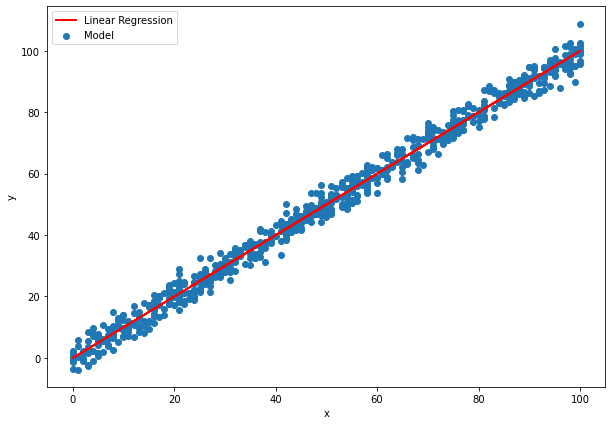

In [86]:
plt.figure(figsize=(10, 7))
ax = plt.axes()
model=ax.scatter(data['x'],data['y'],label='Model')
#predictions=ax.scatter(data['x'],pred_new,label='Predictions')
linear_regression=ax.plot(data['x'],pred_new,color='red', label='Linear Regression',linewidth=2)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.legend()
#plt.legend((model,predictions,linear_regression),('Model','Predictions','Linear Regression'))
plt.show()

### LINEAR REGRESSION IN MULTIPLE VARIABLES: 
### (I) GRADIENT DESCENT

In [87]:
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import matplotlib.pyplot as plt
from numpy.linalg import inv, pinv, LinAlgError

#### Boston Dataset: 

In [88]:
X,y = load_boston(return_X_y=True)

X_train = np.zeros((400,X.shape[1] + 1))
X_train[:,0] = np.ones(400)
X_train[:,1:] = X[0:400,:]
y_train = y[0:400]


theta = np.random.uniform(0,1,size = X_train.shape[1])
epochs = 1000
learning_rate = 0.01

m = X_train.shape[0]
n = X_train.shape[1]
iteration = np.arange(epochs)
cost = np.zeros(epochs)


In [89]:
for i in range(epochs):
    y_pred = np.dot(X_train,theta)
    error = y_pred - y_train
    theta = theta - (1/m)*learning_rate*np.dot(X_train.T,error)
    cost[i] = (1/2*m)*np.sum((error)**2)

<ipython-input-89-efb97f7ba3a4>:5: RuntimeWarning: overflow encountered in square
  cost[i] = (1/2*m)*np.sum((error)**2)


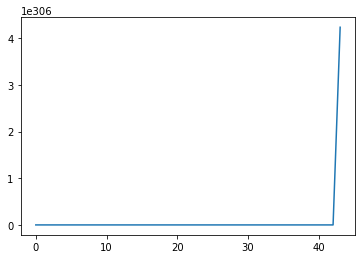

In [90]:
# WITHOUT FEATURE SCALING
plt.plot(iteration, cost)

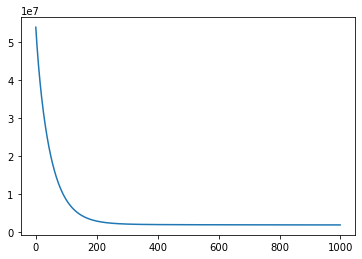

In [91]:
# WITH FEATURE SCALING : Z-SCORE NORMALISATION
scaler = StandardScaler()

scaler.fit(X_train[:,1:])

X_train[:, 1: ] = scaler.transform(X_train[:, 1:])

theta = np.random.uniform(0,1,size = X_train.shape[1])

for i in range(epochs):
    y_pred = np.dot(X_train,theta)
    error = y_pred - y_train
    theta = theta - (1/m)*learning_rate*np.dot(X_train.T,error)
    cost[i] = (1/2*m)*np.sum((error)**2)
    
plt.plot(iteration, cost)

In [92]:
# CALCULATING ERROR

prediction = np.dot(X_train, theta)

print("MAE", metrics.mean_absolute_error(y_true=y_train,y_pred = prediction))
print("MSE", metrics.mean_squared_error(y_true=y_train,y_pred = prediction))

MAE 3.230165074738539
MSE 22.51188179019418


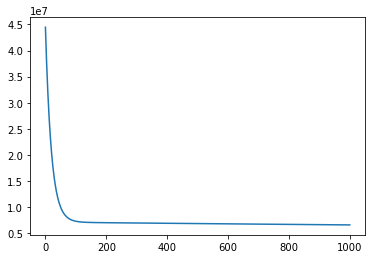

In [94]:
# FEATURE SCALING : MIN-MAX NORMALISATION
min_x = np.min(X_train[:,1:])
max_x = np.max(X_train[:,1:])

X_train[:,1:] = (X_train[:,1:] - min_x)/(max_x - min_x)

theta = np.random.uniform(0,1,size = X_train.shape[1])

for i in range(epochs):
    y_pred = np.dot(X_train,theta)
    error = y_pred - y_train
    theta = theta - (1/m)*learning_rate*np.dot(X_train.T,error)
    cost[i] = (1/2*m)*np.sum((error)**2)
    
plt.plot(iteration, cost)

In [95]:
prediction = np.dot(X_train, theta)

print("MAE", metrics.mean_absolute_error(y_true=y_train,y_pred = prediction))
print("MSE", metrics.mean_squared_error(y_true=y_train,y_pred = prediction))

MAE 6.651408488155287
MSE 82.20620860583226


In [97]:
X_test = np.zeros((106,X.shape[1] + 1))
X_test[:,0] = np.ones(106)
X_test[:,1:] = X[400:506,:]

y_test = y[400:506]


theta = np.random.uniform(0,1,size = X_test.shape[1])
epochs = 1000
learning_rate = 0.01

m = X_test.shape[0]
n = X_test.shape[1]
iteration = np.arange(epochs)
cost = np.zeros(epochs)

print(theta)

[0.0037848  0.46511982 0.21854844 0.2254099  0.97746694 0.13168848
 0.84887896 0.20673733 0.30862028 0.88726471 0.38672846 0.29091003
 0.95132864 0.348734  ]


In [98]:
for i in range(epochs):
    y_pred = np.dot(X_test,theta)
    error = y_pred - y_test
    theta = theta - (1/m)*learning_rate*np.dot(X_test.T,error)
    cost[i] = (1/2*m)*np.sum((error)**2)

C:\Users\DELL\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-98-c426c31a802e>:5: RuntimeWarning: overflow encountered in square
  cost[i] = (1/2*m)*np.sum((error)**2)
<ipython-input-98-c426c31a802e>:4: RuntimeWarning: invalid value encountered in subtract
  theta = theta - (1/m)*learning_rate*np.dot(X_test.T,error)


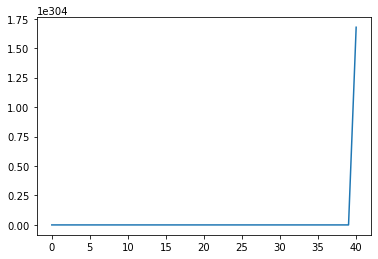

In [99]:
# WITHOUT FEATURE SCALING
plt.plot(iteration, cost)

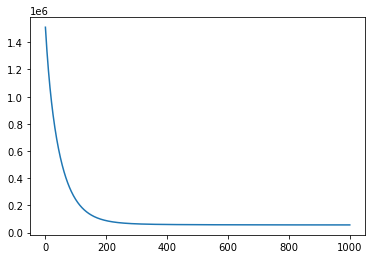

In [100]:
# FEATURE SCALING : Z-SCORE NORMALISATION
scaler = StandardScaler()

scaler.fit(X_test[:,1:])

X_test[:, 1: ] = scaler.transform(X_test[:, 1:])

theta = np.random.uniform(0,1,size = X_test.shape[1])

for i in range(epochs):
    y_pred = np.dot(X_test,theta)
    error = y_pred - y_test
    theta = theta - (1/m)*learning_rate*np.dot(X_test.T,error)
    cost[i] = (1/2*m)*np.sum((error)**2)
    
plt.plot(iteration, cost)

In [101]:
prediction = np.dot(X_test, theta)

print("MAE", metrics.mean_absolute_error(y_true=y_test,y_pred = prediction))
print("MSE", metrics.mean_squared_error(y_true=y_test,y_pred = prediction))

MAE 2.300646325984189
MSE 10.018331719870092


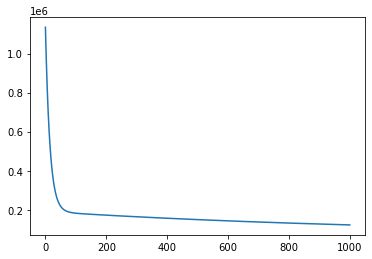

In [102]:
# FEATURE SCALING : MIN-MAX NORMALISATION
min_x = np.min(X_test[:,1:])
max_x = np.max(X_test[:,1:])
X_test[:,1:] = (X_test[:,1:] - min_x)/(max_x - min_x)

theta = np.random.uniform(0,1,size = X_test.shape[1])

for i in range(epochs):
    y_pred = np.dot(X_test,theta)
    error = y_pred - y_test
    theta = theta - (1/m)*learning_rate*np.dot(X_test.T,error)
    cost[i] = (1/2*m)*np.sum((error)**2)
    
plt.plot(iteration, cost)

In [103]:
prediction = np.dot(X_test, theta)

print("MAE", metrics.mean_absolute_error(y_true=y_test,y_pred = prediction))
print("MSE", metrics.mean_squared_error(y_true=y_test,y_pred = prediction))

MAE 3.7949712653724306
MSE 21.767406592307385


### (II) NORMAL EQUATION

In [104]:
temp1 = x[0:400,:]
x_training = np.ones((temp1.shape[0],temp1.shape[1]+1))     
x_training[:,1:]=temp1
y_training = y[0:400]

theta = np.zeros(x_training.shape[1]) 

try:
    i = inv(np.dot(x_training.T,x_training))
except LinAlgError:
    i = pinv(np.dot(x_training.T,x_training))

theta = i.dot(x_training.T).dot(y_training)
y_predicted = np.dot(theta,x_training.T)

print('Training_Y: ',y_training)
print('\n\nPredicted_Y: ',y_predicted)

Training_Y:  [24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.

In [105]:
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_true=y_training, y_pred=y_predicted))
print('Mean Squared Error: ',metrics.mean_squared_error(y_true=y_training, y_pred=y_predicted))

Mean Absolute Error:  6.75043771820387
Mean Squared Error:  83.78216319573654


In [106]:
# TEST DATASET

temp2 = x[400:506,:]
x_testing = np.ones((temp2.shape[0],temp2.shape[1]+1))
x_testing[:,1:] = temp2
y_testing = y[400:506]

theta = np.zeros(x_testing.shape[1]) 

try:
    i = inv(np.dot(x_testing.T,x_testing))
except LinAlgError:
    i = pinv(np.dot(x_testing.T,x_testing))
    
theta = i.dot(x_testing.T).dot(y_testing)
y_predicted = np.dot(theta,x_testing.T)

print('Testing_Y: ',y_testing)
print('\n\nPredicted_Y: ',y_predicted)

Testing_Y:  [ 5.6  7.2 12.1  8.3  8.5  5.  11.9 27.9 17.2 27.5 15.  17.2 17.9 16.3
  7.   7.2  7.5 10.4  8.8  8.4 16.7 14.2 20.8 13.4 11.7  8.3 10.2 10.9
 11.   9.5 14.5 14.1 16.1 14.3 11.7 13.4  9.6  8.7  8.4 12.8 10.5 17.1
 18.4 15.4 10.8 11.8 14.9 12.6 14.1 13.  13.4 15.2 16.1 17.8 14.9 14.1
 12.7 13.5 14.9 20.  16.4 17.7 19.5 20.2 21.4 19.9 19.  19.1 19.1 20.1
 19.9 19.6 23.2 29.8 13.8 13.3 16.7 12.  14.6 21.4 23.  23.7 25.  21.8
 20.6 21.2 19.1 20.6 15.2  7.   8.1 13.6 20.1 21.8 24.5 23.1 19.7 18.3
 21.2 17.5 16.8 22.4 20.6 23.9 22.  11.9]


Predicted_Y:  [16.14099807 15.77324999 15.91239791 15.40550191 16.00185014 15.76331085
 15.76331085 16.1509372  15.31604967 15.25641485 16.16087634 16.04160669
 15.86270222 15.46513673 15.43531932 15.82294567 15.2961714  15.46513673
 15.8030674  15.5645281  15.37568449 15.66391948 15.7235543  15.98197187
 15.49495414 15.76331085 15.53471069 15.47507587 15.90245877 16.00185014
 15.54464983 15.95215446 15.485015   15.26635398 15.96209359 15.3756

In [107]:
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_true=y_testing, y_pred=y_predicted))
print('Mean Squared Error: ',metrics.mean_squared_error(y_true=y_testing, y_pred=y_predicted))

Mean Absolute Error:  4.394767783828414
Mean Squared Error:  28.176527238589056


#### We can observe as a result of the practical, that Gradient descent method works better for large number of features, since feature scaling can be used to standardise the data. Also, we don't have to deal with non-invertiblity. Normal Equation, however has better accuracy and suitable for systems with small number of features. Non-invertibilty can be dealt with using regularization